## Part 13 - Practical Sampling and Estimation in Python
by Kaan Kabalak @ witfuldata.com

Samples and estimation seem like complicated processes. However, once you get the main idea, you will see that they are not so difficult to comprehend. In this part of Witful Python notebooks, I will explain what sampling is in a very simple manner and provide examples on how we use it in Python. 

### Import 

In [1]:
# Import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### What is sampling? Why do we need it? 

In the data world, we have two main concepts when it comes to doing research. The one is the <strong>population</strong> and the other one is the <strong>sample</strong>.

* A Population is the larger group that includes every individual within your interest. For example, if you are interested in learning about the social media usage among 20 year olds in your country and there are 10 million 20 years-old young adults in your country, then these 10 million people form the population of your research. 

* A sample is the limited group that represents the population. It is limited because of real-world difficulties. For example, you cannot find the time and resources to do a research on the entirety of 10 million 20 year-olds in your country. That's why you work with a sample, a smaller group that can represent them to give you a fairly good idea.

Most datasets that you will find on the internet are actually samples. For example, let's assume that you find a dataset on used cars. It makes sense that it's a sample. There is no way that someone has actually collected data on every used car in the world. 

#### How is Sampling in Python Useful?

Like I just said above, most datasets that you are going to find are actually samples themselves. It is very difficult to find a dataset that will completely represent a population. So, if the dataset you are working on is already a sample, why would you need to resample it? 

There could be several reasons depending on what you are working on. However, the main reason probably will be to see how your workflow performs on fractions of the data you have.

Aside from this, resampling a sample is related to sampling distributions and the Central Limit Theorem, some of the most important topics in the field of statistics.  

Let's start by the first main use of resampling. We will see how we can take a fraction of a dataset as a sample. Then, we'll move onto other topics where sampling/resampling can be useful.

In [2]:
# Load the dataset, set na_values to "?" to convert question marks to floats (explained in the Witful Pandas Guide Tutorial)
concrete_df = pd.read_csv("concrete_data.csv")

# Check the info
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [3]:
# Resample %30 (0.3) of your data, save to a variable
sampled_concrete = concrete_df.sample(frac = 0.3, replace=False)

# Check the sample info
sampled_concrete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 659 to 756
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              309 non-null    float64
 1   Blast Furnace Slag  309 non-null    float64
 2   Fly Ash             309 non-null    float64
 3   Water               309 non-null    float64
 4   Superplasticizer    309 non-null    float64
 5   Coarse Aggregate    309 non-null    float64
 6   Fine Aggregate      309 non-null    float64
 7   Age                 309 non-null    int64  
 8   Strength            309 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 24.1 KB


## Defining Samples Based on Population Parameters

To define samples based on certain population parameters, we can use the .rvs function/method with Scipy. We actually used this in the previous part on probability distributions, but now we can truly understand what they do.

This function gives us random samples that are compliant with the population parameters we define. <strong>The resulting sample's statistics (mean, standart deviation etc.) are not the same as the ones we defined. They are only compliant </strong>

In [4]:
# Import 
from scipy.stats import norm 

# Random sample with size = 30 and population parameters mean = 180, std = 10
norm_sample =  norm.rvs(180, 10, size = 30)

# The mean and the std of your sample
print(f"The mean of your sample is {np.mean(norm_sample)}")
print(f"The standart deviation of your sample is {np.std(norm_sample)}")

The mean of your sample is 179.57891859974146
The standart deviation of your sample is 9.68671253787728


## Population Parameter Estimation

Okay, you have a sample in your hands. You want to make some calculations based on the mean and the standard deviation but there is a problem: How do you know that the mean and the standard deviation you got from your sample is compliant with the actual population? Even more difficult, how can you answer this question without being able to measure your entire population?

To solve these problems, we use something called estimation. Through statistical methods, we estimate the mean and the standard deviation of the population by using what we already know about the sample. 

### Estimate of the Population Mean 

Estimating the population mean is fairly simple. Population mean is considered to be equal to the sample mean. This stems from the fact that the sample mean is usually close to the population mean, especially as you start to increase the number of the sample elements. For example, let's assume that you have a population of 1000. Randomly selecting just 50-60 elements from that population as a sample and measuring the mean of that sample will give you a pretty good idea about the mean of the population. With that being said, there is always a percentage of error. 

### Estimate of the Population standard Deviation

Unlike the mean, we sadly cannot assume that the population standard deviation is the same as the population standard deviation. However, the thing we have to do is actually quite simple. First, a question: Do you remember how to calculate variance and standard deviation from our NumPy tutorial? If not, here is a reminder:

* <strong> Variance </strong> : The sum of the squared distances of each element to the mean. It is simply performed by substracting the mean value of the array from each element, taking the square of the result and then taking the sum of all results. After that, you divide this result by the length of your array. 

* <strong> Standard Deviation </strong> : standard deviation is the square root of variance. When we take the square of distances for variance we also cause the scale of the data points to be distorted. standard deviation allows us to fix this by taking the square root. The usage of standard deviation for the description of data variance is more common than the usage of variance only by itself. This is due to the fact that the standard deviation is more in line with the unit of the data itsel whereas the unit of variance will be much larger than the unit of data itself. 

Estimation of the population standard deviation is calculated in a very similar way. The only difference is that when we are calculating the variance, after doing everything in order, we divide the results by sample size (array length) - 1, instead of directly using the sample size we have. 

We could write paragraphs about this but let me simply explain the real reason why we do this. We substract 1 from our sample size because the calculation we are doing is based on only the <strong> estimation </strong> of the population mean,  <strong>not the actual </strong> population mean itself. When you calculate an estimation of the standard deviation, you do so based on a variance which is based on the <strong> estimation </strong> of the population mean. Variance depends heavily on the mean because it is a measure of distance of the sample elements to the mean. As I have explained before, you then divide this mean by the sample size (number of the elements). 

Now, think about it. If you increase the sample size, you increase the denominator, therefore decreasing the result of the variance. If you decrease the sample size, you decrease the denominator, therefore increasing the result of the variance.

After reading through this, you may ask: Why do we want to boost up the variance of the estimation? Because the population variance will always be higher than sample variance. This is something that is tested and approved.

Another question may arise: Why do we divide by sample size - 1 and not -2 or -3?

Well, some statisticians tested this out before and they found at the most accurate results were achieved by sample size - 1. So, we can say that it has become something like an industry practice.

Let's see how we can estimate the population mean from a sample in Python:

In [5]:
# Define an array (this shall be our sample)
x_arr = np.array([3, 10, 20, 35, 40, 58, 67 ,74, 87 , 96, 120])

# The distances of values to the mean
distances_x = x_arr - np.mean(x_arr)

# The square of the distances (to make negative values neutral)
distances_sq_x = distances_x ** 2

# The sum of the squared distances
sum_dsq_x = np.sum(distances_sq_x)

# Divide the result by the number of elements - 1
arr_variance = sum_dsq_x/(len(x_arr) -1)
arr_variance

1402.0727272727274

This was the manual version. To easily estimate population mean from a sample, you can use NumPy's var function. To state that we are estimating a population variance, not calculating it directly from the population or the sample itself, we set the ddof argument to 1.

In [6]:
# Estimation of the population variance
np.var(x_arr, ddof=1)

1402.0727272727274

To get the estimated population standard deviation, we just need to get the square root of the estimated population variance.

In [7]:
est_var = np.var(x_arr, ddof=1)
est_std = np.sqrt(est_var)
print("The estimated population standard deviation is {}".format(est_std))

The estimated population standard deviation is 37.44426160672323


## Measuring Estimation Reliability

I told you before that estimating the population mean is quite easy because, unlike the population variance, we can just assume that it is very close (almost equal) to the sample mean. Now, here is the question: How sure can we be? Is it possible to measure how 'confident' we are in our estimation?

The answer is yes! Yes, it is. This is possible thanks to confidence intervals. However before we move onto them, we have to learn more about the topics of the law of large numbers, sampling distributions and the central limit theorem. We have to understand how these three concepts work together to be able to understand how confidence intervals are calculated. 

### The Law of Large Numbers

The law of large numbers basically asserts the fact that larger sample sizes will lead you to results closer to the population paramaters.

For example, let's say that you want to simulate a normal distribution, based on the heights of people. The <strong>population</strong> mean is 167 and the <strong>population</strong> standard deviation is 7.

The larger your sample size, the closer your sample mean will be to the population mean.

Let's see how this works in Python:

In [8]:
# Import norm
from scipy.stats import norm


sample_sizes = np.arange(5, 26, 10)

for n in sample_sizes:
    print(f"The sample mean for {n} samples is  {np.mean(norm.rvs(167, 7, size = n))}")

The sample mean for 5 samples is  168.6822038347967
The sample mean for 15 samples is  162.03765255461738
The sample mean for 25 samples is  168.90635275491317


As you can see, the larger the sample size, the closer our sample mean is to the population mean.

This is the law of large numbers in action. Now let's move on to another concept.

### The Sampling Distribution of the Mean

A sampling distribution is the distribution of a statistic (like mean or standard deviation) you collected through multiple sampling/resampling processes. 

We will

* Take a sample with a size of 30 from a normal distribution that has the population parameters mean = 167 std = 7
* Repeat this process 50 times
* Take the mean for each sample

After we do these, we will have 50 means. These means will have formed a distribution. This is what we call a sampling distribution of the mean. Now let's see how this works in Python?

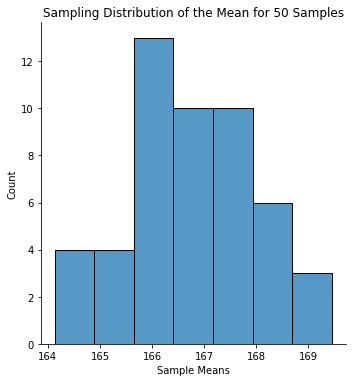

In [9]:
# Define an empty list (sample_means)
sample_means = []
# Repeat 50 times
for i in range (50):
    # Take a sample with size = 30, get the mean, append the result to the mean list
    sample_means.append(np.mean(norm.rvs(167, 7, size = 30)))


# Visualize the sample means (this is the visualization of the sampling distribution of the mean)
sns.displot(x = sample_means, kind = "hist")
plt.title("Sampling Distribution of the Mean for 50 Samples")
plt.xlabel("Sample Means")
plt.show()
    

##### Standard Error
Standard error is the standard deviation of the sampling distribution of the mean. SEM is a common abbreviation used for the standard error.

Overall this process up to the visualization and the standard error is not that complicated. We just got some samples with a certain size from a distribution and calculated the mean for each sample, in just a few lines of code. 

And don't worry, things won't get more complicated. However, what we have seen so far is actually related to a very important concept: The Central Limit Theorem!

### The Central Limit Theorem (CLT)

So, what is this? To keep things nice and simple we can say that this theorem asserts that the sampling distribution of the mean becomes closer to a normal distribution as we increase the sample size.

In other words, means of your samples will always gather around a certain value based on the population mean.

Why is this important? 

Because it applies to almost every important distribution out there!

You can basically take the mean of almost every distribution, right? So, with CLT you can be sure that your sample mean is a good representation of the population mean, as long as you have a certain sample size. To make things even better, the sample size does not have to be super large for this theorem to apply. Usually around 50-100 is enough. 


Let's see the CLT in action:

First, let's take a look at the Poisson distribution we are going to use as our population example.


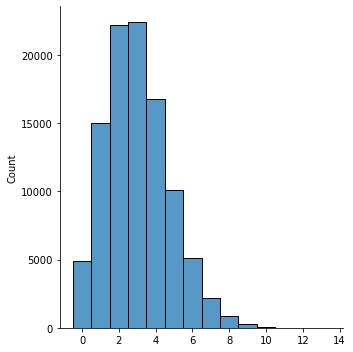

In [10]:
# Import
from scipy.stats import poisson

# Population
poi_population = poisson.rvs(3, size = 100000)

# Visualize the population
sns.displot(x=poi_population, kind="hist", discrete = True)
plt.show()


Now, look at this. This distribution is skewed. It is not normal.

Let's remember what CLT claims, this time within this context:

* If you take samples from this distribution and measure the means of those samples, the sampling distribution of the mean will get closer to a normal distribution <strong>even if the population distribution is a Poisson distribution</strong>.

We can try out if this is true by defining a function that will plot the sampling distribution of the mean for different sample sizes:

In [11]:
# Import Poisson
from scipy.stats import poisson

# Define the function
def clt_try_poi (n):
    # Define an empty list for the sampling distribution of the mean
    sampling_dist_mean = []
    # Take n samples with population mean parameter = 3 and repeat for 500 times, append the means to the list
    for i in range (500):
        sampling_dist_mean.append(np.mean(poisson.rvs(3, size = n)))
    # Plot the sampling distribution of the mean
    sns.displot(x = sampling_dist_mean, kind="hist")
    plt.xticks(np.arange(2,5,1))
    plt.title(f"Sample size = {n}")
    plt.xlabel("Sample means")
    plt.show()

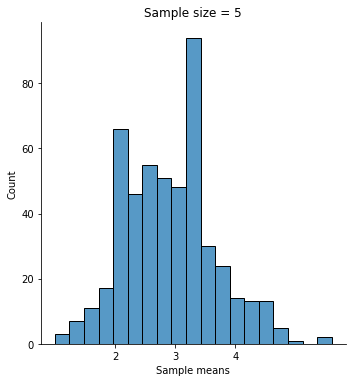

In [12]:
# Sample size = 5
clt_try_poi(5)

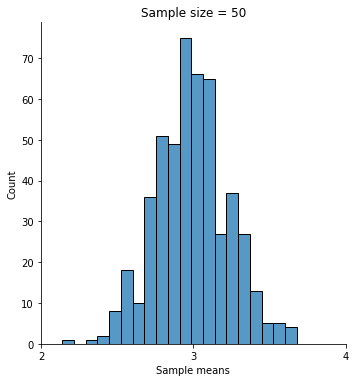

In [13]:
# Sample size = 50
clt_try_poi(50)

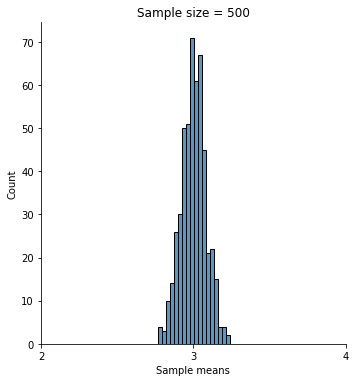

In [14]:
# # Sample size = 500
clt_try_poi(500)

As you can see, as we increse the sample size, we see that the sampling distribution of the mean gathers around the population  parameter of 3 and starts to resemble a normal distribution. The distribution becomes tighter around the population mean. The variance decreases. The standard error (the standard deviation of the sampling distribution of the mean), decreases.

Once again, what is the importance of all this? Now, read carefully, here is the deal:

1) We already visually proved that even moderately increasing our sample size ensures that sample means gather around the population mean, the variance (and therefore the standard error) decreases.

2) This makes our sample mean reliable when we use it as a representation of the population mean. If our sample size is above a certain number (this number is usually low like 30-40), we know that our sample mean is going to be close to the population mean due to the low variance in the sampling distribution of the mean. 

3) In turn, all this allows us to effectively use <strong> the mean and the standart deviation of any sample of any distribution by only making minor tweaks based on population, </strong> to make statistical calculations. 


What kind of calculations? Here comes the confidence intervals:


## Confidence Intervals (CI)

Confidence intervals help us answer one simple question:

"Based on a sample we have, how confident can we be that the true population mean falls within a certain range?"

Thanks to CLT, we know that the sample mean will be close to the population mean when we have enough samples. This supports the confidence interval's reliability.

<strong>Note: There are minor changes based on populations when you are calculating confidence intervals. However, most of the time you will be able to use a pre-defined function. The basic principle of how CLT affects confidence interval calculation does not change. CLT allows us to use very similar methods for different population distributions when we are calculating confidence intervals. In a future part, I will go into the full details of calculating confidence intervals. For now, we will take a look at one one example as I don't want this part to be dysfunctionally long. </strong>


Let's calculate a confidence interval for a normal distribution:

#### Calculating CI When We Know the Original Population

First define a sample with random values based on an normal distribution

In [15]:
# Import stats
import scipy.stats as sta

# Define a sample with random values generated based on population parameters (mean = 170, std = 6)
sample = norm.rvs(170, 6, size = 50)



In [16]:
# Calculate the confidence interval (alpha = how confident we want to be, df = our sample size -1, loc = sample mean, scale = standart error)
confidence_interval = confidence_interval = sta.t.interval(alpha=0.95,df = len(sample) - 1, loc= np.mean(sample), scale= sta.sem(sample))

# Print the confidence interval
print(confidence_interval)


(168.45402077797172, 171.65709631794346)


This shows us that we can be %95 sure that our true population mean will be between these values. 

<strong>Note:</strong> You may have noticed that we used something called "t" to calculate the confidence interval. After going through hypothesis tests, we will revisit the topic of estimation and there you will learn about different methods to calculate confidence intervals and the driving mechanisms of statistical calculations. The aim of this part was to get you accustomed to the most practical concepts. We will explore the details later on. 